В этом ноутбуке я демонстрирую свои навыки работы с датафреймом - генерация, преобразования, вычисления, визуализация.

In [1]:
import random
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt

### Часть 1
Генерируем датафрейм из синтетических данных.

In [2]:
sample="1234567890abcdefghijk"
user_id=[''.join(random.sample(sample,15)) for i in range(1000)]

In [3]:
order_number=[random.randint(1,10) for i in range(1000)]

In [4]:
click2delivery=ss.norm.rvs(loc=1440, scale=200, size=1000)

In [5]:
l=1
order_items_sum=ss.expon.rvs(loc=1, scale=1/l, size=1000)

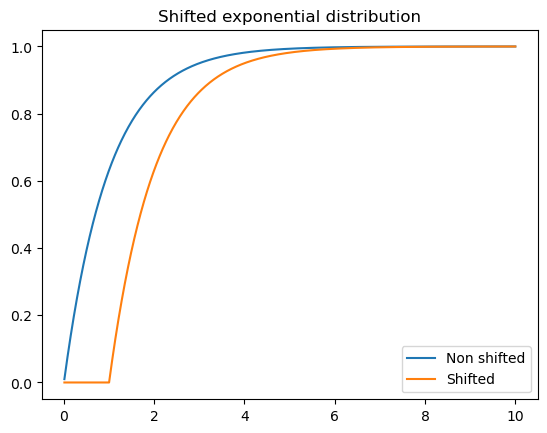

In [6]:
#Смещенное экспоненциальное распределение
x=np.linspace(0.01, 10, 1000)

cdf=ss.expon.cdf(x,loc=0)
cdf2=ss.expon.cdf(x,loc=1)

plt.plot(x,cdf, label='Non shifted')
plt.plot(x,cdf2, label='Shifted')
plt.title('Shifted exponential distribution')
plt.legend()
plt.show()

In [7]:
retention=[np.random.choice([1,2,3,4,5],p=[0.35, 0.25, 0.2, 0.15, 0.05]) for i in range(1000)]

In [8]:
df=pd.DataFrame({
                    'user_id':user_id,
                    'order_number':order_number,
                    'click2delivery':click2delivery,
                    'order_items_sum':order_items_sum,
                    'retention': retention
    
                })

In [9]:
df.head(5)

,user_id,order_number,click2delivery,order_items_sum,retention
0,a3fjh76i8k4g19d,3,1570.885878,1.481447,5
1,i89hgb57231ek0j,2,1646.254373,2.089601,4
2,3eiah89cgd462kf,7,1575.833411,1.139360,3
3,ih71k2fcb60adj9,2,1479.433871,5.601049,1
4,43edfabg9ch26k5,9,1636.666418,1.690186,3


### Часть 2
Выполняем преобразования.

In [10]:
df.drop_duplicates(subset='user_id', keep='first', inplace=True)
df.shape

(1000, 5)

In [11]:
df['avg_time']=df.groupby('order_number').click2delivery.transform('mean')

In [12]:
df['avg_time'].nunique()

10

In [13]:
new_col=np.zeros(1000)
new_col[1]=1
for i in range(2,1000):
    new_col[i]=(new_col[i-2]+new_col[i-1])*0.5
    
df['new_col']=new_col

In [14]:
def modified_userid(s):
    new_s=''
    digits=[]
    for i in range(len(s)):
        if s[i].isalpha():
            new_s+=s[i]
        else:
            digits.append(s[i])
    val=int(''.join(digits))**2
    new_s+=str(val)
    
    return(new_s)

In [15]:
df['modified_userid']=df['user_id'].apply(lambda x: modified_userid(x))

In [16]:
df.head()

,user_id,order_number,click2delivery,order_items_sum,retention,avg_time,new_col,modified_userid
0,a3fjh76i8k4g19d,3,1570.885878,1.481447,5,1451.437968,0.000,afjhikgd14200981759561
1,i89hgb57231ek0j,2,1646.254373,2.089601,4,1453.586049,1.000,ihgbekj8023198718736100
2,3eiah89cgd462kf,7,1575.833411,1.139360,3,1408.363749,0.500,eiahcgdkf151680649444
3,ih71k2fcb60adj9,2,1479.433871,5.601049,1,1453.586049,0.750,ihkfcbadj507811586881
4,43edfabg9ch26k5,9,1636.666418,1.690186,3,1463.895040,0.625,edfabgchk192953740225


Найдем моду, медиану, среднее, дисперсию и стандартное отклонение для столбцов click2delivery, order_items_sum.

In [21]:
print('\n-----Медиана----\n')
print(df[['click2delivery','order_items_sum','retention']].median())
# print('\n-----Мода----\n')
# print(df[['click2delivery','order_items_sum','retention']].mode())
print('\n-----Среднее----\n')
print(df[['click2delivery','order_items_sum','retention']].mean())
print('\n-----Дисперсия----\n')
print(df[['click2delivery','order_items_sum','retention']].var())
print('\n-----Стандартное отклонение----\n')
print(df[['click2delivery','order_items_sum','retention']].std())


-----Медиана----

click2delivery     1450.622230
order_items_sum       1.686107
retention             2.000000
dtype: float64

-----Среднее----

click2delivery     1442.249740
order_items_sum       2.001872
retention             2.291000
dtype: float64

-----Дисперсия----

click2delivery     42933.946755
order_items_sum        1.084577
retention              1.423743
dtype: float64

-----Стандартное отклонение----

click2delivery     207.205084
order_items_sum      1.041430
retention            1.193207
dtype: float64


Мода есть только у столбца retention, у остальных столбцов моды нет, так как все значения в них различны.

In [30]:
print('\n-----Мода----\n')
print(df['retention'].mode().iloc[0])


-----Мода----

1


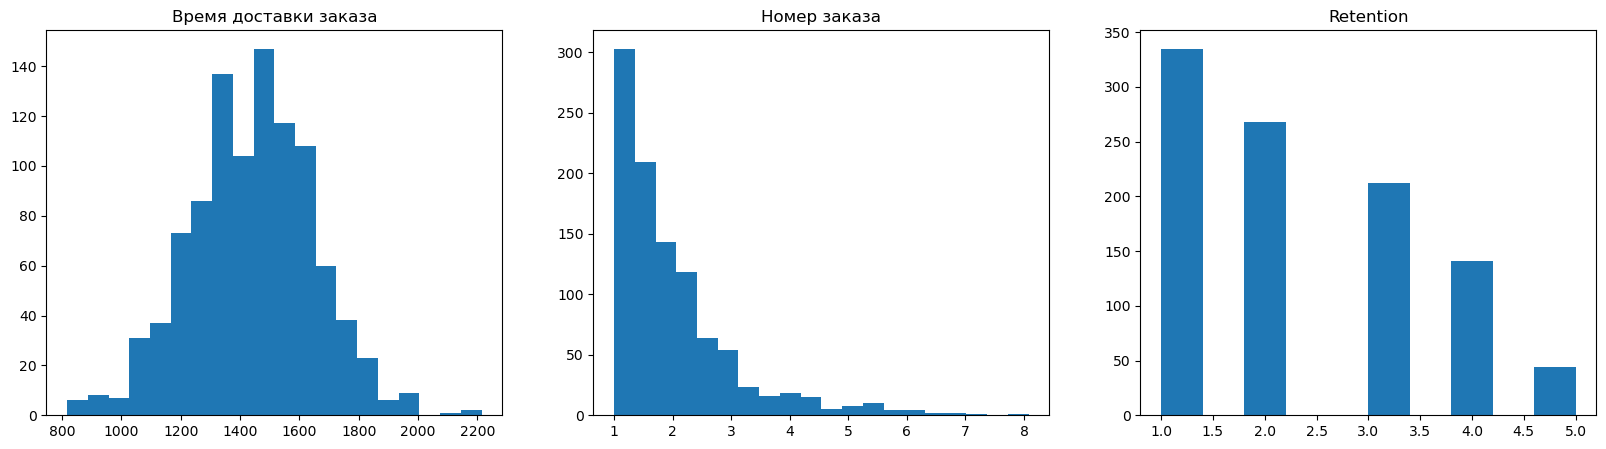

In [32]:
fig, axes = plt.subplots(1,3,figsize=(20,5))

axes[0]=plt.subplot(131)
axes[0].hist(df['click2delivery'], bins=20)
axes[0].set(title='Время доставки заказа')

axes[1]=plt.subplot(132)
axes[1].hist(df['order_items_sum'], bins=20)
axes[1].set(title='Номер заказа')

axes[2]=plt.subplot(133)
axes[2].hist(df['retention'])
axes[2].set(title='Retention')

plt.show()

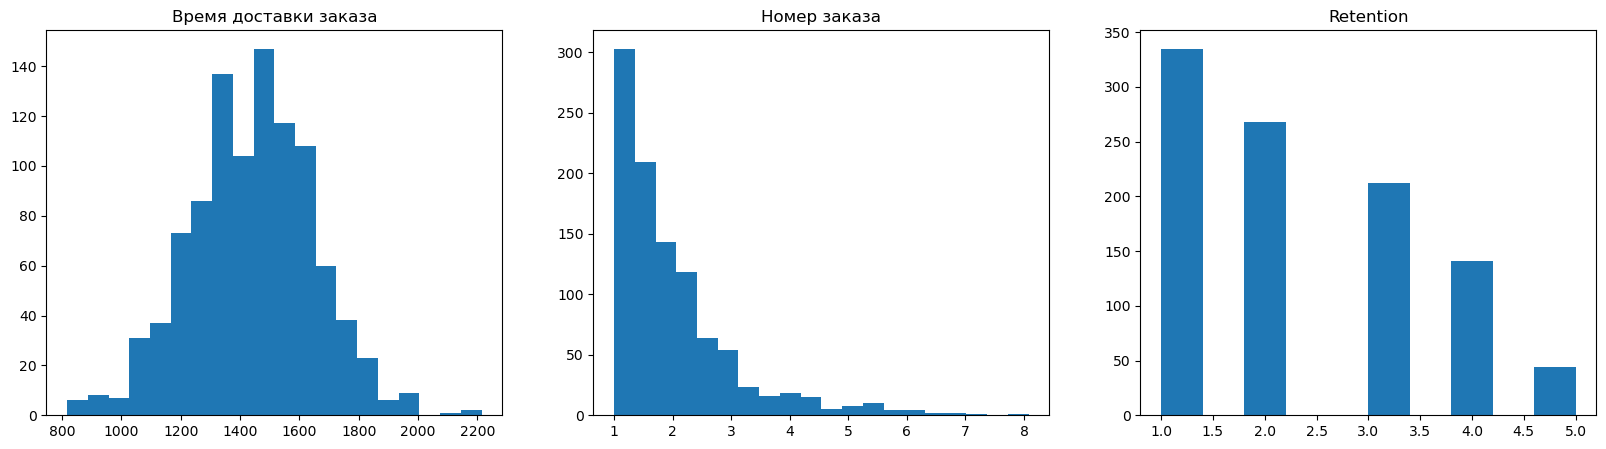

In [33]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.hist(df['click2delivery'], bins=20)
plt.title('Время доставки заказа')

plt.subplot(132)
plt.hist(df['order_items_sum'], bins=20)
plt.title('Номер заказа')

plt.subplot(133)
plt.hist(df['retention'])
plt.title('Retention')

plt.show()

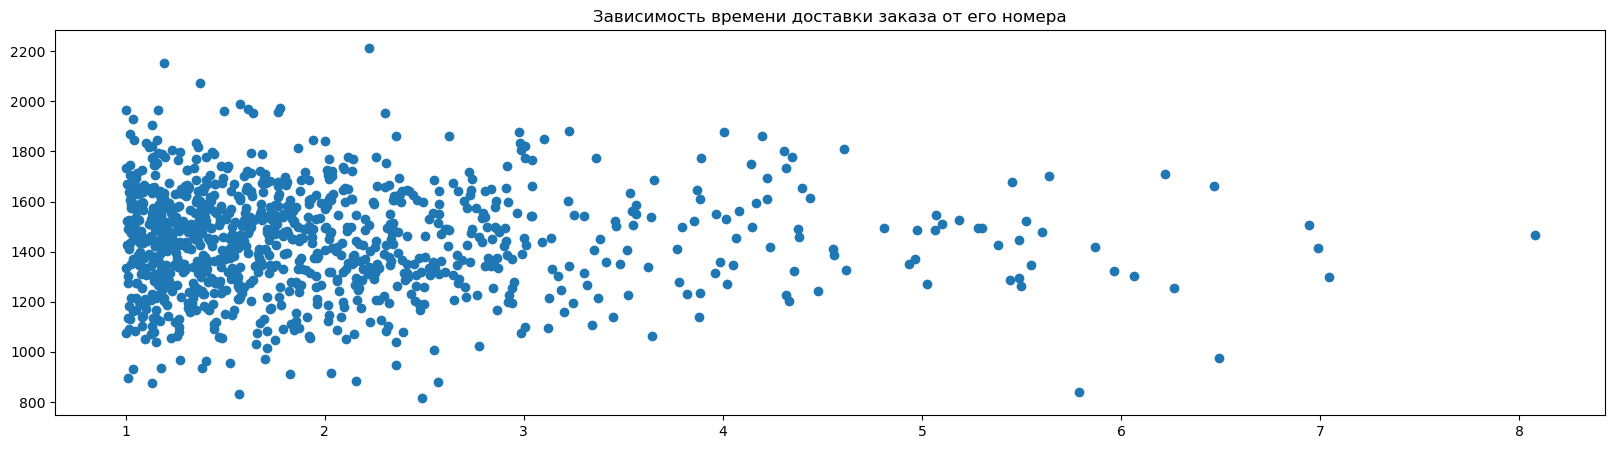

In [20]:
plt.figure(figsize=(20,5))
plt.scatter(df['order_items_sum'],df['click2delivery'])
plt.title('Зависимость времени доставки заказа от его номера')
plt.show()